In [1]:
%matplotlib inline

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
#from config import api_key

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


thompson ca
cap malheureux mu
taolanaro mg
scarborough tt
nanakuli us
college us
moron mn
yerbogachen ru
zhangye cn
belaya gora ru
grindavik is
pevek ru
port lincoln au
mayo ca
ushuaia ar
okhotsk ru
ushuaia ar
henties bay na
sao filipe cv
upernavik gl
saint george bm
kapaa us
bluff nz
bengkulu id
padang id
lephepe bw
edson ca
busselton au
pavlohrad ua
abha sa
saskylakh ru
taolanaro mg
nizhneyansk ru
kodiak us
hermanus za
butaritari ki
mar del plata ar
new norfolk au
khatanga ru
hamilton bm
teya ru
geraldton au
davila ph
hofn is
muros es
belushya guba ru
sovetskaya gavan ru
port elizabeth za
tuktoyaktuk ca
bluff nz
acandi co
hilo us
kavaratti in
jamestown sh
kuliyapitiya lk
mahebourg mu
roald no
husavik is
chingirlau kz
punta arenas cl
ushuaia ar
mataruska banja rs
darhan mn
makakilo city us
loikaw mm
buala sb
punta arenas cl
dikson ru
alugan ph
katsuura jp
castro cl
touros br
shiyan cn
mahebourg mu
tuktoyaktuk ca
kodiak us
ao luk th
kapaa us
port alfred za
aktau kz
tiksi ru
fortuna us


cape town za
chernyshevskiy ru
barentsburg sj
bredasdorp za
umzimvubu za
busselton au
mataura pf
victoria sc
mataura pf
shamgarh in
jarjis tn
punta arenas cl
muyezerskiy ru
vuktyl ru
grand gaube mu
langsa id
qaanaaq gl
qaanaaq gl
saint-pierre re
akdepe tm
esperance au
punta arenas cl
khonuu ru
severodvinsk ru
port elizabeth za
victoria sc
torrington us
provideniya ru
port elizabeth za
iqaluit ca
ushuaia ar
bredasdorp za
avarua ck
kenai us
meyungs pw
georgetown gy
arraial do cabo br
henties bay na
lazaro cardenas mx
ushuaia ar
hilo us
rikitea pf
vaini to
ponta do sol cv
ushuaia ar
pisco pe
hermanus za
kruisfontein za
dongli cn
tuktoyaktuk ca
chuy uy
saldanha za
kruisfontein za
ribeira grande pt
busselton au
yulara au
bowen au
ushuaia ar
haibowan cn
ushuaia ar
norman wells ca
busselton au
mataura pf
atuona pf
ushuaia ar
busselton au
mataura pf
bethel us
caohai cn
jamestown sh
svetlyy ru
ushuaia ar
brodokalmak ru
rikitea pf
san quintin mx
chapais ca
buala sb
busselton au
bilma ne
saskylak

cape town za
vila franca do campo pt
laguna br
kapaa us
bengkulu id
katsuura jp
ushuaia ar
beruwala lk
east london za
marawi sd
hithadhoo mv
caborca mx
rapar in
dien bien vn
taolanaro mg
naze jp
dikson ru
san quintin mx
kapaa us
beihai cn
rikitea pf
hobart au
port alfred za
rikitea pf
port hardy ca
harper lr
rikitea pf
rikitea pf
atuona pf
cape town za
khatanga ru
clyde river ca
wilmington us
hobart au
arraial do cabo br
faya td
asfi ma
mar del plata ar
barentsburg sj
eucaliptus bo
mar del plata ar
mataura pf
primore ru
klaksvik fo
ternate id
bluff nz
belmonte br
kencong id
lompoc us
yeppoon au
fukue jp
lardos gr
bengkulu id
rikitea pf
jamestown sh
atambua id
punta arenas cl
punta arenas cl
rikitea pf
tarakan id
vardo no
axim gh
kapaa us
matamoros mx
qui nhon vn
atuona pf
reyes bo
bambamarca pe
qui nhon vn
butaritari ki
uri in
matay eg
cairns au
rikitea pf
ushuaia ar
ribeira grande pt
saint-francois gp
bredasdorp za
carnarvon au
lavumisa sz
mataura pf
cape town za
ushuaia ar
hasaki jp


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [9]:
# API: Application Programming Interface

In [10]:
import requests
requests.__version__

'2.27.1'

In [11]:
# Make a Request for Data to an API

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Handle API Request Errors with try-except Blocks
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | thompson
Processing Record 2 of Set 13 | cap malheureux
Processing Record 3 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 13 | scarborough
Processing Record 5 of Set 13 | nanakuli
Processing Record 6 of Set 13 | college
Processing Record 7 of Set 13 | moron
Processing Record 8 of Set 13 | yerbogachen
Processing Record 9 of Set 13 | zhangye
Processing Record 10 of Set 13 | belaya gora
Processing Record 11 of Set 13 | grindavik
Processing Record 12 of Set 13 | pevek
Processing Record 13 of Set 13 | port lincoln
Processing Record 14 of Set 13 | mayo
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | okhotsk
Processing Record 17 of Set 13 | henties bay
Processing Record 18 of Set 13 | sao filipe
Processing Record 19 of Set 13 | upernavik
Processing Record 20 of Set 13 | saint george
Processing Record 21 of Set 13 | kapaa
Processing Record 22 of Set 13 | bluff
Processing Record 23 of Set 13 | bengkulu
Proc

Processing Record 34 of Set 16 | bathsheba
Processing Record 35 of Set 16 | virginia
Processing Record 36 of Set 16 | kavieng
Processing Record 37 of Set 16 | longyearbyen
Processing Record 38 of Set 16 | geilo
Processing Record 39 of Set 16 | aleksinac
Processing Record 40 of Set 16 | cernilov
Processing Record 41 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 16 | eyl
Processing Record 43 of Set 16 | mount gambier
Processing Record 44 of Set 16 | haibowan
City not found. Skipping...
Processing Record 45 of Set 16 | avarua
Processing Record 46 of Set 16 | barrow
Processing Record 47 of Set 16 | kuusamo
Processing Record 48 of Set 16 | ribeira grande
Processing Record 49 of Set 16 | berlevag
Processing Record 50 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 17 | kruisfontein
Processing Record 2 of Set 17 | yellowknife
Processing Record 3 of Set 17 | shimoda
Processing Record 4 of Set 17 | port blair
Processing Reco

Processing Record 12 of Set 20 | brodokalmak
Processing Record 13 of Set 20 | san quintin
Processing Record 14 of Set 20 | chapais
Processing Record 15 of Set 20 | bilma
Processing Record 16 of Set 20 | constitucion
Processing Record 17 of Set 20 | chongqing
Processing Record 18 of Set 20 | vanimo
Processing Record 19 of Set 20 | weyburn
Processing Record 20 of Set 20 | sovetskiy
Processing Record 21 of Set 20 | byumba
Processing Record 22 of Set 20 | sorland
Processing Record 23 of Set 20 | ganzhou
Processing Record 24 of Set 20 | moerai
Processing Record 25 of Set 20 | manaure
Processing Record 26 of Set 20 | zyryanskoye
Processing Record 27 of Set 20 | banjar
Processing Record 28 of Set 20 | cockburn town
Processing Record 29 of Set 20 | nome
Processing Record 30 of Set 20 | oron
Processing Record 31 of Set 20 | maibong
Processing Record 32 of Set 20 | kiria
Processing Record 33 of Set 20 | jiddah
City not found. Skipping...
Processing Record 34 of Set 20 | sakaiminato
Processing Re

Processing Record 2 of Set 24 | aromashevo
Processing Record 3 of Set 24 | xining
Processing Record 4 of Set 24 | qasigiannguit
Processing Record 5 of Set 24 | ouango
Processing Record 6 of Set 24 | tabas
Processing Record 7 of Set 24 | yakeshi
Processing Record 8 of Set 24 | erenhot
Processing Record 9 of Set 24 | ayaviri
Processing Record 10 of Set 24 | vila franca do campo
Processing Record 11 of Set 24 | laguna
Processing Record 12 of Set 24 | beruwala
Processing Record 13 of Set 24 | marawi
Processing Record 14 of Set 24 | caborca
Processing Record 15 of Set 24 | rapar
Processing Record 16 of Set 24 | dien bien
City not found. Skipping...
Processing Record 17 of Set 24 | naze
Processing Record 18 of Set 24 | beihai
Processing Record 19 of Set 24 | harper
Processing Record 20 of Set 24 | clyde river
Processing Record 21 of Set 24 | faya
Processing Record 22 of Set 24 | asfi
Processing Record 23 of Set 24 | eucaliptus
Processing Record 24 of Set 24 | primore
City not found. Skipping

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-3.84,65,75,8.05,CA,2022-02-13 21:46:36
1,Cap Malheureux,-19.9842,57.6142,81.46,77,91,7.00,MU,2022-02-13 21:46:58
2,Scarborough,54.2797,-0.4044,48.65,91,100,5.01,GB,2022-02-13 21:47:00
3,Nanakuli,21.3906,-158.1547,80.55,59,75,10.36,US,2022-02-13 21:47:01
4,College,64.8569,-147.8028,14.79,82,100,0.00,US,2022-02-13 21:47:01
5,Moron,-34.6534,-58.6198,80.35,35,0,7.94,AR,2022-02-13 21:47:02
6,Yerbogachen,61.2767,108.0108,-30.28,100,89,3.27,RU,2022-02-13 21:47:03
7,Zhangye,38.9342,100.4517,27.28,51,100,3.85,CN,2022-02-13 21:47:04
8,Belaya Gora,68.5333,146.4167,-21.06,96,92,5.61,RU,2022-02-13 21:47:05
9,Grindavik,63.8424,-22.4338,28.35,86,0,6.91,IS,2022-02-13 21:47:06


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-02-13 21:46:36,55.7435,-97.8558,-3.84,65,75,8.05
1,Cap Malheureux,MU,2022-02-13 21:46:58,-19.9842,57.6142,81.46,77,91,7.00
2,Scarborough,GB,2022-02-13 21:47:00,54.2797,-0.4044,48.65,91,100,5.01
3,Nanakuli,US,2022-02-13 21:47:01,21.3906,-158.1547,80.55,59,75,10.36
4,College,US,2022-02-13 21:47:01,64.8569,-147.8028,14.79,82,100,0.00
5,Moron,AR,2022-02-13 21:47:02,-34.6534,-58.6198,80.35,35,0,7.94
6,Yerbogachen,RU,2022-02-13 21:47:03,61.2767,108.0108,-30.28,100,89,3.27
7,Zhangye,CN,2022-02-13 21:47:04,38.9342,100.4517,27.28,51,100,3.85
8,Belaya Gora,RU,2022-02-13 21:47:05,68.5333,146.4167,-21.06,96,92,5.61
9,Grindavik,IS,2022-02-13 21:47:06,63.8424,-22.4338,28.35,86,0,6.91


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Plot Latitude vs. Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

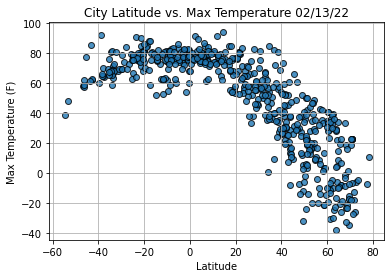

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

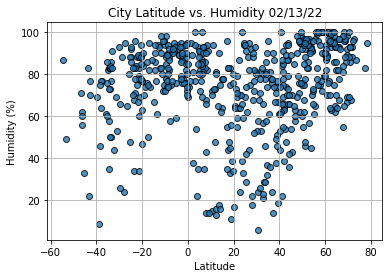

In [20]:
# Plot Latitude vs. Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

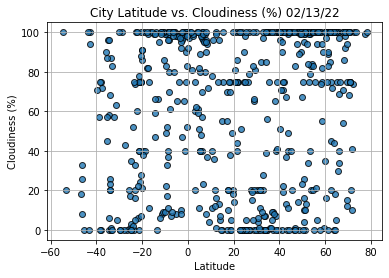

In [21]:
# Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

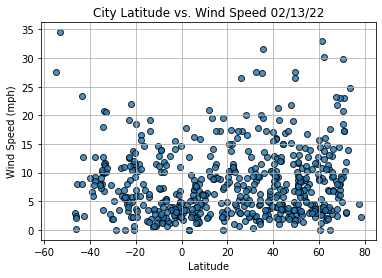

In [22]:
# Plot Latitude vs. Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Use Linear Regression to Find the Relationship Between Variables
# Find the Correlation Between Latitude and Maximum Temperature


In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-02-13 21:47:08
Lat                         -54.8
Lng                         -68.3
Max Temp                    38.86
Humidity                       87
Cloudiness                    100
Wind Speed                  27.63
Name: 13, dtype: object

In [26]:
city_data_df['Lat'] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
561     True
562     True
563     True
564     True
565    False
Name: Lat, Length: 566, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-02-13 21:46:36,55.7435,-97.8558,-3.84,65,75,8.05
2,Scarborough,GB,2022-02-13 21:47:00,54.2797,-0.4044,48.65,91,100,5.01
3,Nanakuli,US,2022-02-13 21:47:01,21.3906,-158.1547,80.55,59,75,10.36
4,College,US,2022-02-13 21:47:01,64.8569,-147.8028,14.79,82,100,0.00
6,Yerbogachen,RU,2022-02-13 21:47:03,61.2767,108.0108,-30.28,100,89,3.27


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

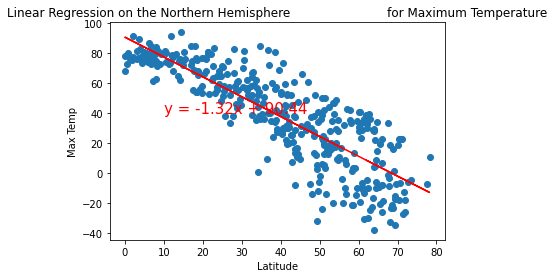

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

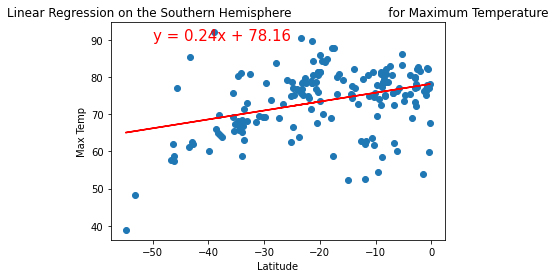

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

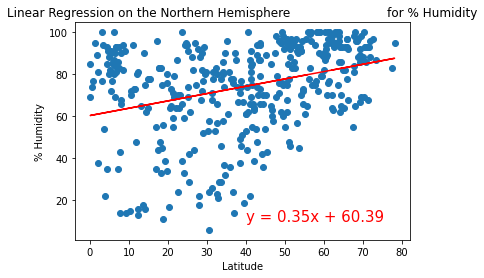

In [36]:
# Find the Correlation Between Latitude and Percent Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


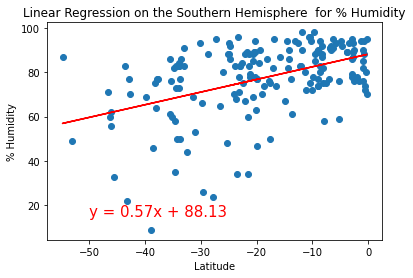

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere  for % Humidity', 
                       '% Humidity',(-50,15))


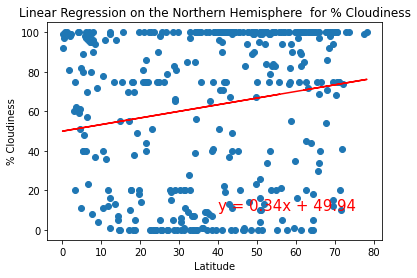

In [45]:
# Find the Correlation Between Latitude and Percent Cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere  for % Cloudiness', 
                       '% Cloudiness',(40,10))



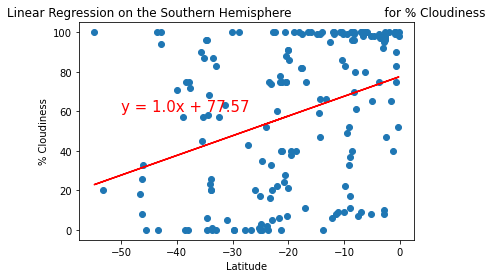

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))


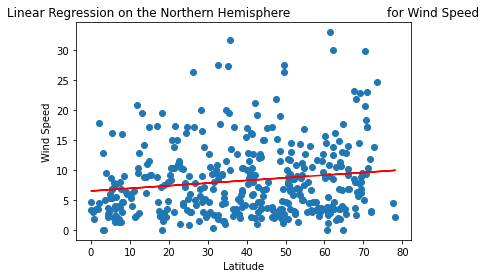

In [51]:
# Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

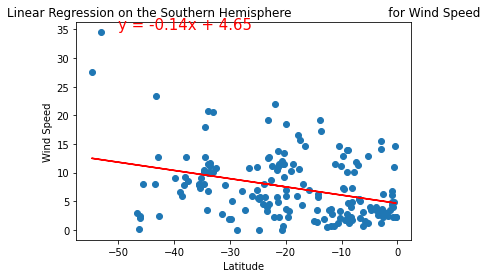

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))